In [3]:
# Wenn Daten nicht aufgeteilt sind:

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
 !conda install -c conda-forge keras --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/bellaboga/anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           2 KB
    absl-py-0.8.0              |           py37_0         157 KB  conda-forge
    astor-0.7.1                |             py_0          22 KB  conda-forge
    binutils_impl_linux-64-2.31.1|       h6176602_1        16.5 MB
    binutils_linux-64-2.31.1   |       h6176602_9          10 KB  conda-forge
    c-ares-1.15.0              |    h516909a_1001         100 KB  conda-forge
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.7.

In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_test = y_test == 0

In [6]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)


Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.2666 - accuracy: 0.8962
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1879 - accuracy: 0.9242
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1640 - accuracy: 0.9426
Epoch 4/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.1500 - accuracy: 0.9489
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1405 - accuracy: 0.9516
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1340 - accuracy: 0.9535
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1288 - accuracy: 0.9541
Epoch 8/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.1254 - accuracy: 0.9549
Epoch 9/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.1222 - accuracy: 0.9552
Epoch 10/10
60000/60000 [=============================

In [10]:
model.evaluate(X_test.reshape(-1, 784), y_test)

10000/10000 [==============================] - 1s 58us/step


[0.12475655553936958, 0.953499972820282]

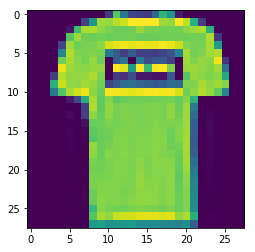

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[1])
plt.show()

In [44]:
model.predict(X_train[1].reshape(1,784))

array([[0.822384]], dtype=float32)